#### Introduction

Healthcare is one of the most important services offered if not the most significant to ever exist. Genuine service to humanity should
be the motive to every healthcare providers' hearts. The Nairobi West Hospital has been a healthcare provider in Kenya since the 1980s. Providing affordable optimum healthcare that is unmatched has been their driving source since inception. 

The Nairobi West Hospital has a Cardiac Centre that uses cutting-edge clinical innovations to treat heart conditions.
The Facility has recognized the importance of empowering patients with accurate and data-driven insights on their cardiovascular health(The health of the heart) hence has commisioned a project to investigate the factors that affect cardiovascular health.

By identifying the factors that affect cardiovascular health, The Nairobi West Hospital will be able to offer valuable advice to their patients that they can make informed healthy decisions on their cardiovascular health and improving it.

#### Problem Statement

The Nairobi West Hospital is a facility where patients international and domestic receive treatment and management of cardiac conditions. While the facility has been able to provide such treatments, The Nairobi West Hospital still faces the challenge of providing valuable advice to their patients that enables to prevent cardiovascular disease altogether. The lack of comprehensive inisghts on this issue hinders patients from being adviced on the informed decisions they can make to improve their cardiovascular health and prevent cardiac conditions. 

Addressing these challenges requires a comprehensive analysis of the patients' history of their health records to identify the factors that have led to cardiac conditions before. The Facility aim to accomplish objectives such as:

1) Identify the factors that lead to cardiovascular disease:
   The Nairobi West Hospital aims to unearth the attributes of patients' health records that have affected their cardiovascular health.
   By identifying these attributes this will allow patients to acquire very valuable information on factors that conclusively lead to cardiac conditions and be able to make informed decisions on the right action to take to improve their cardiovascular health.



#### Data Understanding

The aim of this section to get familiar with our data and its structure. This data will allow us to gain valuable insights on the objectives of this project.

#### Importing Libraries

In [112]:
#Import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [113]:
# reading the csv file into a pandas dataframe
data = pd.read_csv('CVD_cleaned.csv')
data.head() # printing the first five rows of the dataset to make sure it has loaded correctly.

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [114]:
# print out datatypes of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

We have some categorical(objects) and numerical(float64) columns in the data.

In [115]:
# print out the numerical data type columns
numerical_columns = data.select_dtypes(include=['float64'])
numerical_columns

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0,0.0
308850,180.0,69.85,21.48,8.0,15.0,60.0,4.0
308851,157.0,61.23,24.69,4.0,40.0,8.0,4.0
308852,183.0,79.38,23.73,3.0,30.0,12.0,0.0


In [116]:
# print out the categorical data type columns
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,Yes
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,No
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,No
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,No
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,No
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,No
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,Yes
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,No


So we have 7 columns with numerical data and 12 columns with categorical data.

In [117]:
# print out dataset descriptive statistics
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


#### Data Preparation


This phase of the CRISP-DM process is all about ensuring data is ready for analysis and modelling. It consists of various parts such as:
- **Dealing with missing values.**
- **Dealing with duplicates.**
- **Dealing with outliers.**
- **Dealing with wrong data types.**

This is basically preparing the data for modelling.

In [118]:
# Making a copy of the dataset
new_data = data.copy()
# print the numerical datatypes of the dataset copy
num_columns = new_data.select_dtypes(include='float64')
num_columns

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...
308849,168.0,81.65,29.05,4.0,30.0,8.0,0.0
308850,180.0,69.85,21.48,8.0,15.0,60.0,4.0
308851,157.0,61.23,24.69,4.0,40.0,8.0,4.0
308852,183.0,79.38,23.73,3.0,30.0,12.0,0.0


#### Changing the data types of the categorical columns

In [119]:
# prints out columns of the data with categorical data
cat_columns = new_data.select_dtypes(include=['object'])
# printing out the unique values of the Age_Category column
new_data['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [120]:
# Lets start replacing values of the Age_Category column data
replacement_dict = {'18-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6,'50-54':7,'55-59':8,'60-64':9,'65-69':10,
'70-74':11,'75-79':12,'80+':13}
new_data['Age_Category'] =  new_data['Age_Category'].replace(replacement_dict)
new_data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,11,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,11,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,9,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,12,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,13,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,2,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,10,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,3,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,10,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


For the next categorical column we want to deal with is `General_Health`. The data in the `General_Health` column is ordinal data and to convert it to numeric we need to do label encoding manually.

In [121]:
new_data['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [122]:
replacement_dict2 = {'Poor':1,'Fair':2,'Good':3,'Very Good':4,'Excellent':5}
new_data['General_Health'] =  new_data['General_Health'].replace(replacement_dict2)
new_data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Within the past 2 years,No,No,No,No,No,No,Yes,Female,11,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,4,Within the past year,No,Yes,No,No,No,Yes,No,Female,11,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,4,Within the past year,Yes,No,No,No,No,Yes,No,Female,9,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,1,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,12,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,3,Within the past year,No,No,No,No,No,No,No,Male,13,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,Within the past year,Yes,No,No,No,No,No,No,Male,2,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,2,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,10,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,4,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,3,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,4,Within the past year,Yes,No,No,No,No,No,No,Male,10,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


The rest of the categorical columns have values 'Yes' or 'No' in the data and so to convert them to numeric we will use get_dummies method.

In [123]:
cat_columns = new_data.select_dtypes(include=['object']).columns.tolist()

In [124]:
for column in cat_columns:
    unique_values = new_data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Unique values in Exercise: ['No' 'Yes']
Unique values in Heart_Disease: ['No' 'Yes']
Unique values in Skin_Cancer: ['No' 'Yes']
Unique values in Other_Cancer: ['No' 'Yes']
Unique values in Depression: ['No' 'Yes']
Unique values in Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Unique values in Arthritis: ['Yes' 'No']
Unique values in Sex: ['Female' 'Male']
Unique values in Smoking_History: ['Yes' 'No']


In [125]:
replacement_dict3 = {'Within the past 2 years':3,'Within the past year':4,'5 or more years ago':1,
'Within the past 5 years':2,'Never':0}
new_data['Checkup'] =  new_data['Checkup'].replace(replacement_dict3)
new_data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,No,No,No,No,No,No,Yes,Female,11,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,4,4,No,Yes,No,No,No,Yes,No,Female,11,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,4,4,Yes,No,No,No,No,Yes,No,Female,9,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,1,4,Yes,Yes,No,No,No,Yes,No,Male,12,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,3,4,No,No,No,No,No,No,No,Male,13,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,Yes,No,No,No,No,No,No,Male,2,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,2,2,Yes,No,No,No,No,Yes,No,Male,10,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,4,1,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,3,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,4,4,Yes,No,No,No,No,No,No,Male,10,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


According to the observations i have made about the categorical columns in the dataset the next step I am taking is using the `get_dummies` method to convert them to numeric. Some categorical columns will be dropped from the model as they will loose their value if converted to numeric using the method stated as the values are categorical but very random and do not fit in the bracket of either being 'Yes' or 'No'.

Since we have already converted `Checkup` , `Age_Category` and `General Health` columns we will not include them in `get_dummies` method.

In [135]:
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf],
 labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

In [132]:
new_data['Fruit_Consumption'].unique()
new_data['Smoking_History'].value_counts()

Smoking_History
No     183590
Yes    125264
Name: count, dtype: int64

In [136]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,Underweight
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Overweight
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,Obesity
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Overweight
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0,Overweight
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0,Normal weight
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0,Normal weight
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0,Normal weight


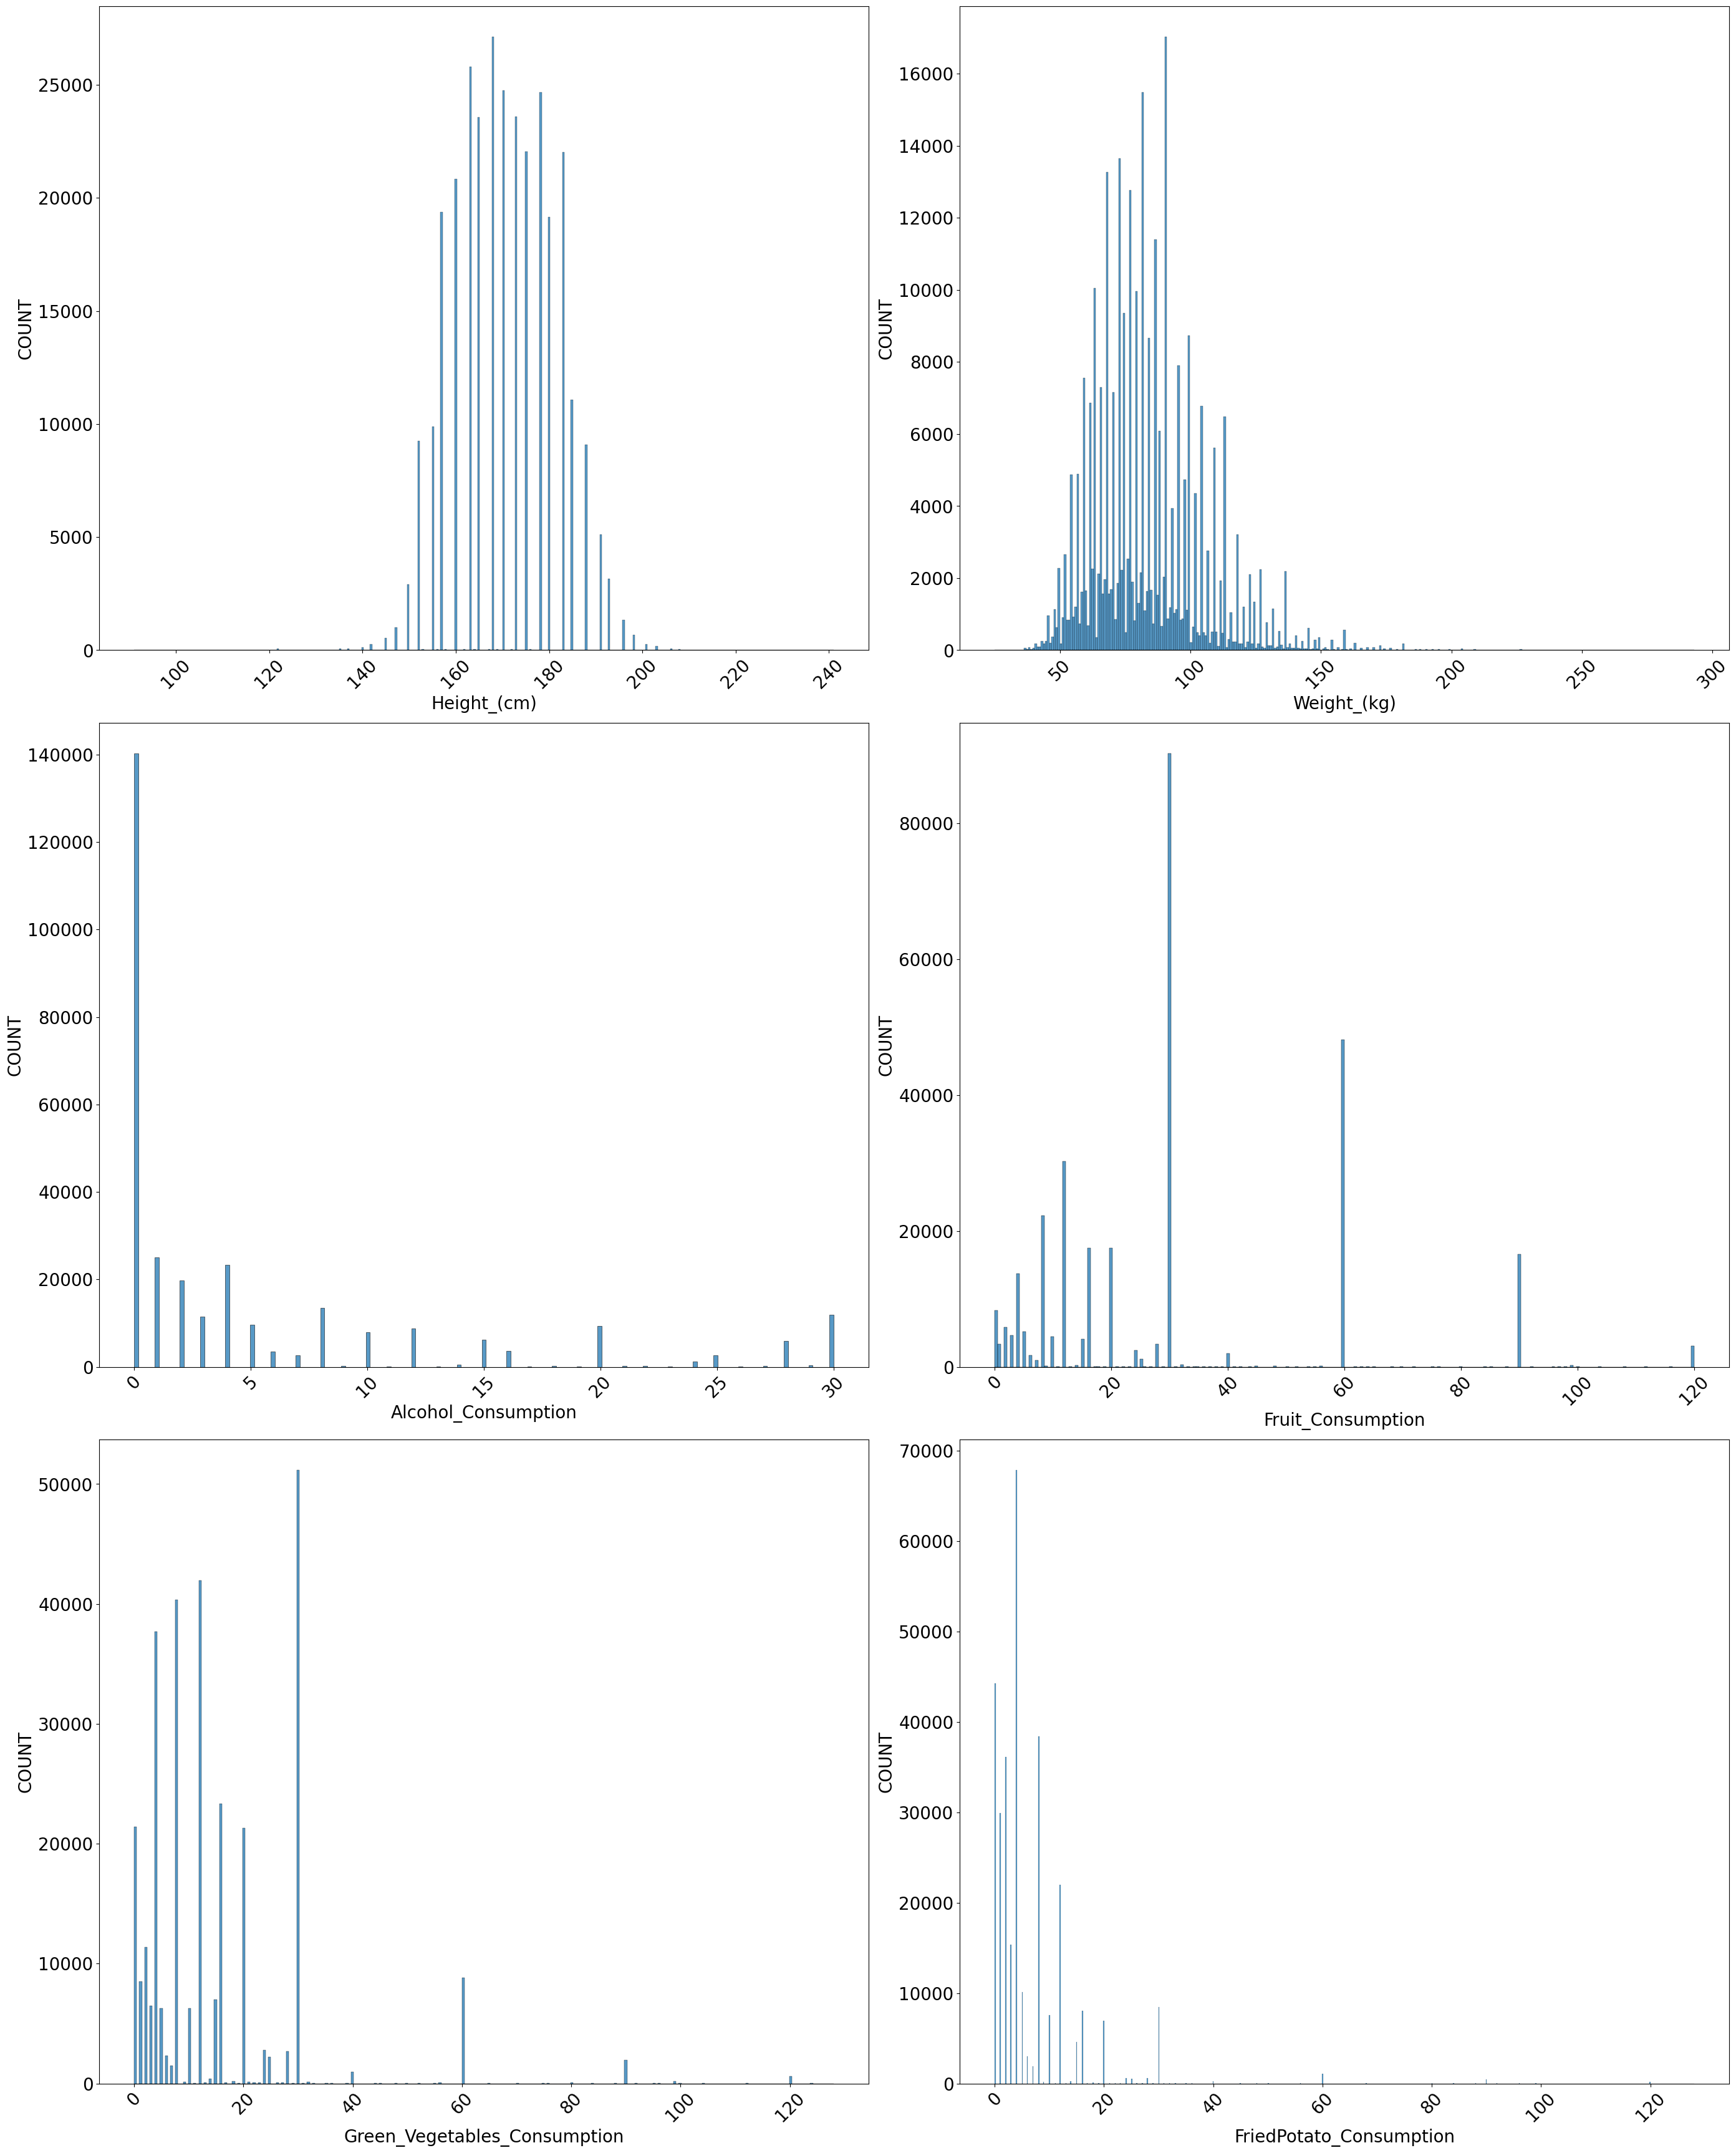

In [138]:
# Displays the distribution of the numerical variables in the dataset
fig = plt.figure(figsize=(28,160))
numerical_columns = data.select_dtypes(['float64']).columns.tolist() # converts dataframe to list
numerical_columns.remove('BMI')
for index, col in enumerate(numerical_columns):
    ax= fig.add_subplot(14,2,index+1)
    sns.histplot(x=data[col], ax=ax)
    plt.ylabel('COUNT',size=20) # sets label for y-axis
    plt.xlabel(col,size=20) # set label for x-axis
    plt.xticks(size = 20, rotation = 45 )
    plt.yticks(size = 20)
    
plt.tight_layout()
plt.show() # displays distribution

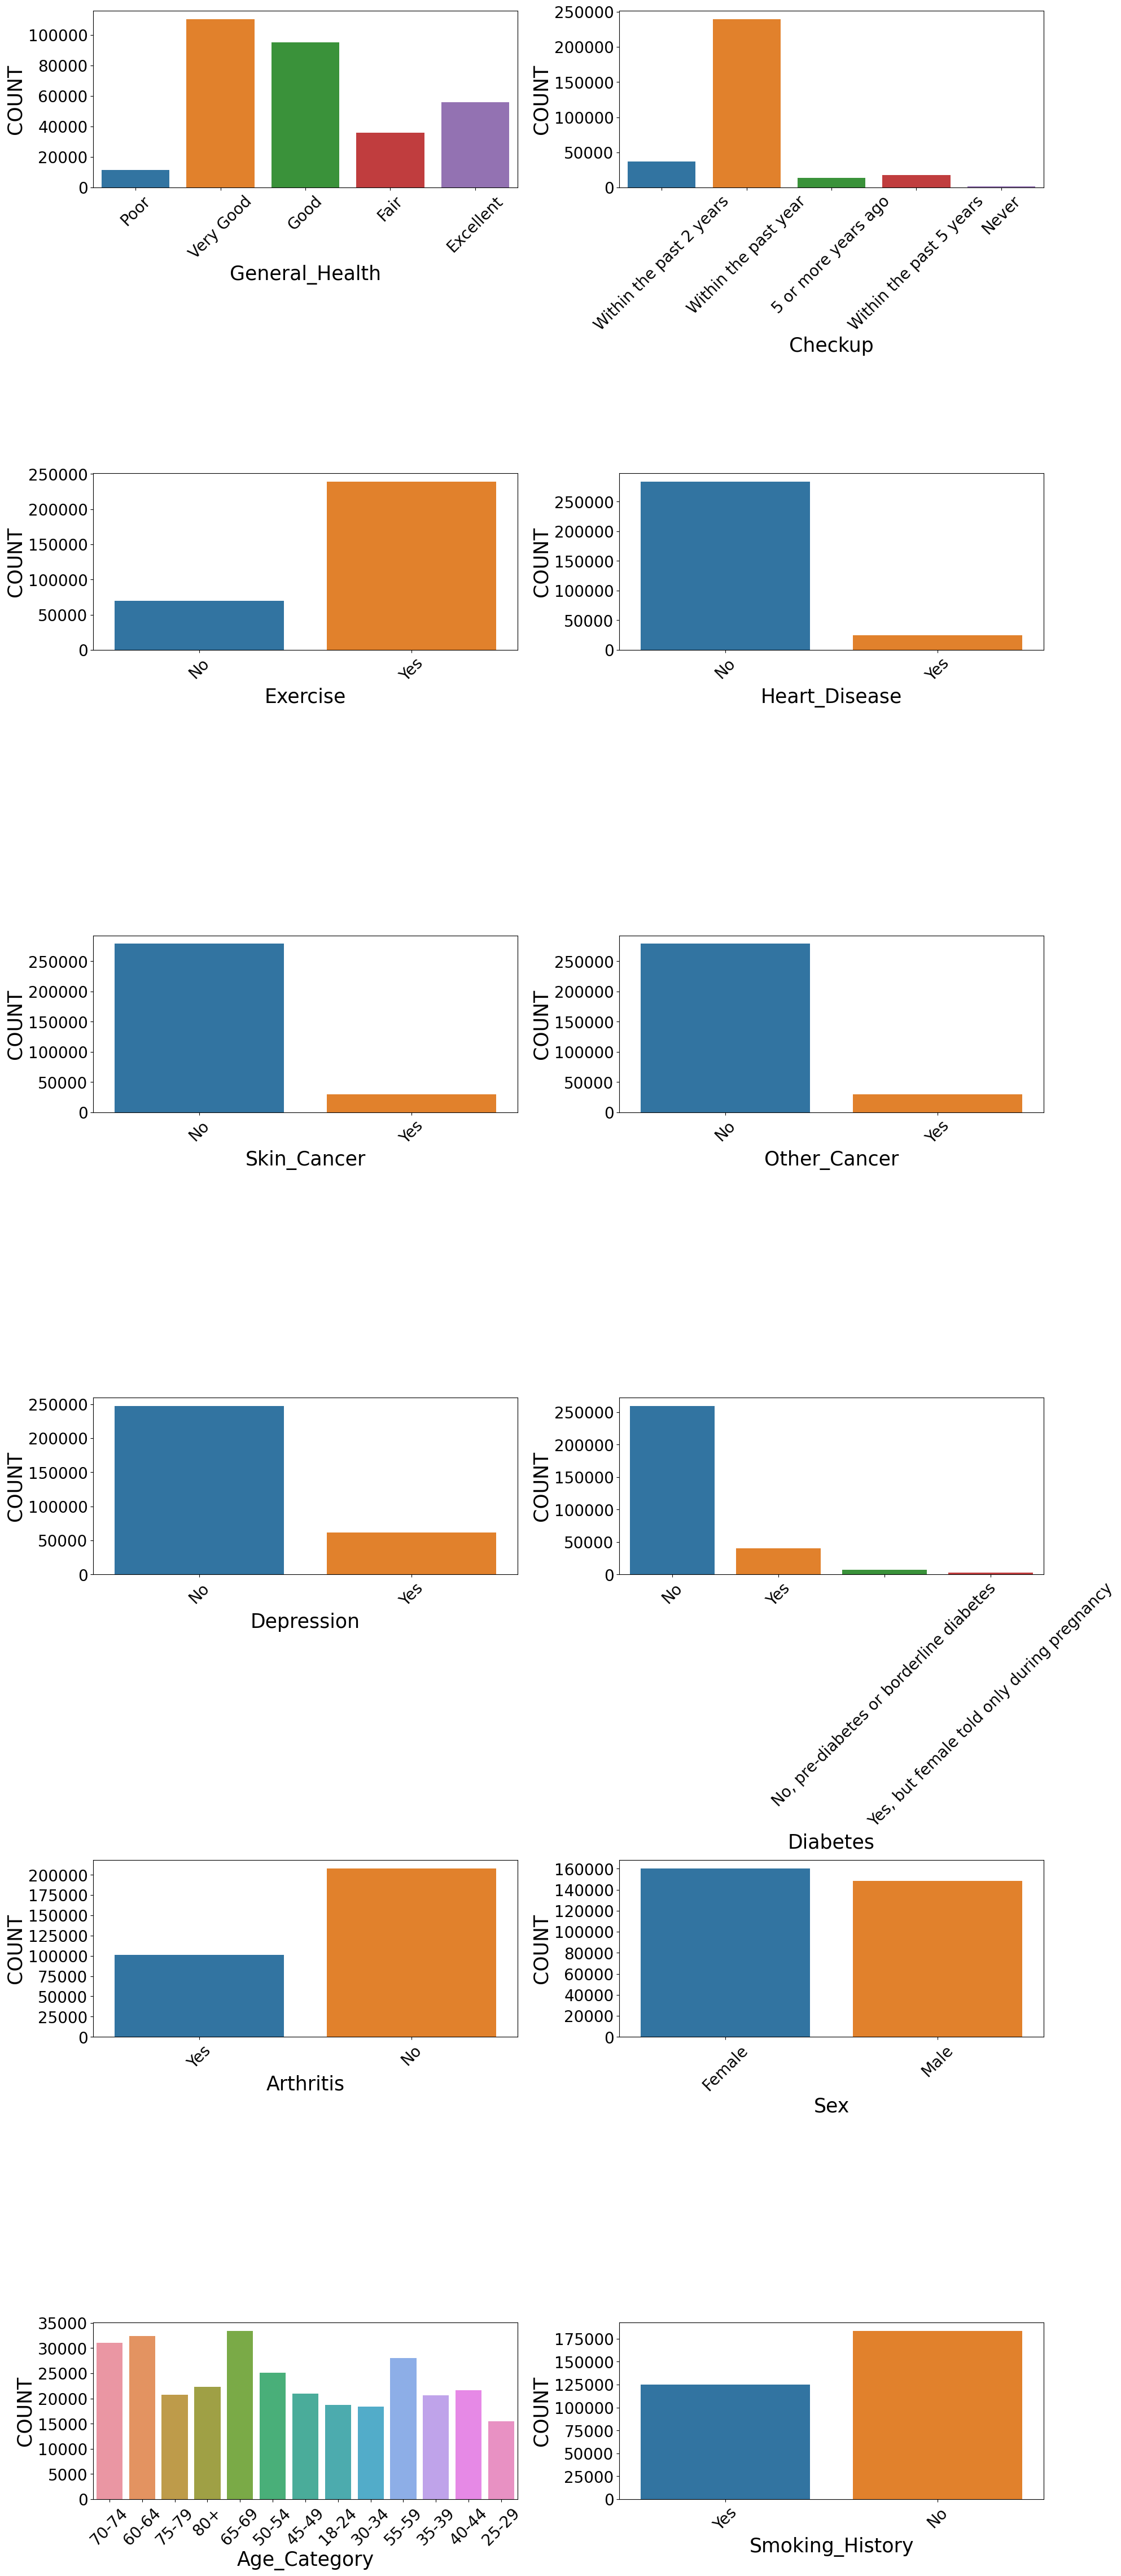

In [148]:
fig = plt.figure(figsize=(20,200))
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
for index, col in enumerate(categorical_columns):
    plt.subplot(25,2,index+1)
    sns.countplot(x=col, data=data)
    plt.ylabel('COUNT', size = 25)
    plt.xlabel(col, fontsize = 25)
    plt.xticks(size = 20, rotation = 45)
    plt.yticks(size = 20)
fig.tight_layout(pad=1.0)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   General_Health                308854 non-null  object  
 1   Checkup                       308854 non-null  object  
 2   Exercise                      308854 non-null  object  
 3   Heart_Disease                 308854 non-null  object  
 4   Skin_Cancer                   308854 non-null  object  
 5   Other_Cancer                  308854 non-null  object  
 6   Depression                    308854 non-null  object  
 7   Diabetes                      308854 non-null  object  
 8   Arthritis                     308854 non-null  object  
 9   Sex                           308854 non-null  object  
 10  Age_Category                  308854 non-null  object  
 11  Height_(cm)                   308854 non-null  float64 
 12  Weight_(kg)                   